In [1]:
#!pip install ultralytics==8.0.196

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/Car_Acc_NoAcc


In [3]:
from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.2.0 CUDA:0 (NVIDIA GeForce RTX 3090 Ti, 24248MiB)
Setup complete ✅ (72 CPUs, 125.8 GB RAM, 11.3/128.0 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
#!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Yn1KtLKQ2y6l7nw7qrQB")
project = rf.workspace("graduation-project-tnnxo").project("graduation-project-p9qp9")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Graduation-Project-1 in yolov8:: 100%|██████████| 13450/13450 [00:02<00:00, 5506.23it/s]


In [6]:
!yolo task=detect mode=train model=yolov8m.pt data={dataset.location}/data.yaml epochs=100 imgsz=800 plots=True

100%|██████████████████████████████████████| 49.7M/49.7M [00:00<00:00, 99.6MB/s]
New https://pypi.org/project/ultralytics/8.2.39 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.2.0 CUDA:0 (NVIDIA GeForce RTX 3090 Ti, 24248MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/Car_Acc_NoAcc/Graduation-Project-1/data.yaml, epochs=100, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_lab

In [7]:
!ls {HOME}/runs/detect/train/

F1_curve.png			 labels_correlogram.jpg  train_batch25292.jpg
PR_curve.png			 results.csv		 val_batch0_labels.jpg
P_curve.png			 results.png		 val_batch0_pred.jpg
R_curve.png			 train_batch0.jpg	 val_batch1_labels.jpg
args.yaml			 train_batch1.jpg	 val_batch1_pred.jpg
confusion_matrix.png		 train_batch2.jpg	 val_batch2_labels.jpg
confusion_matrix_normalized.png  train_batch25290.jpg	 val_batch2_pred.jpg
labels.jpg			 train_batch25291.jpg	 weights


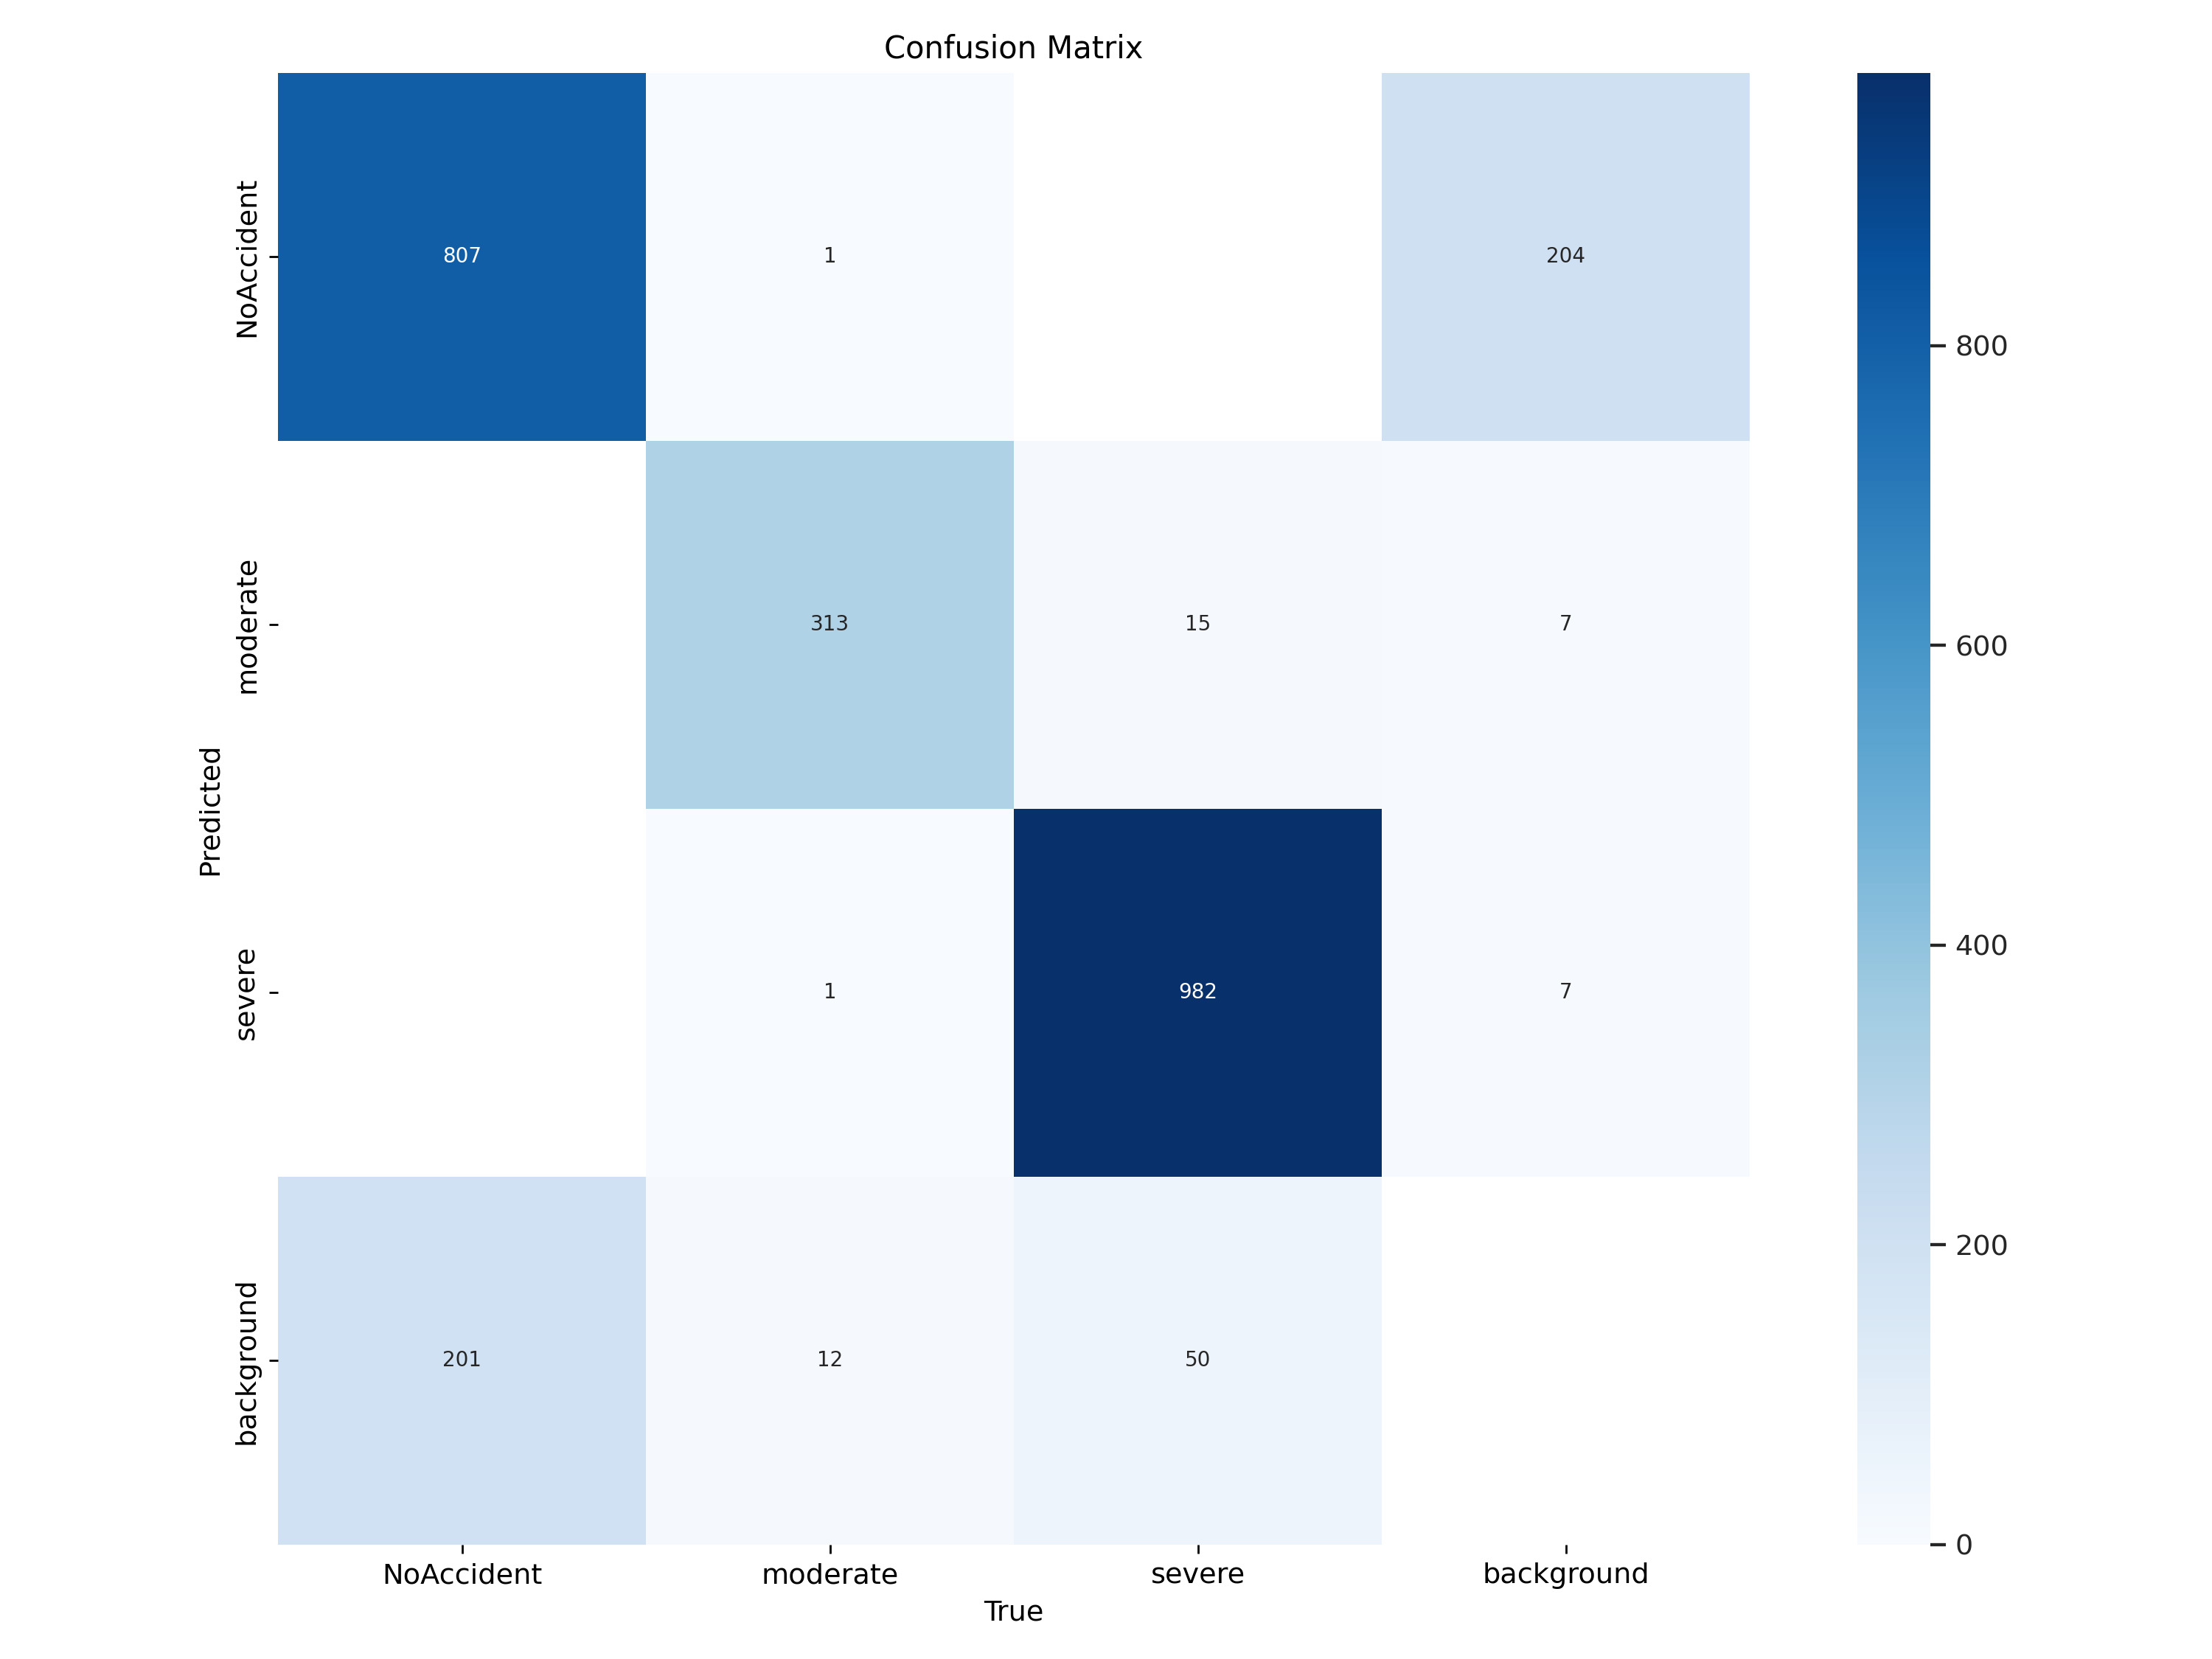

In [8]:
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

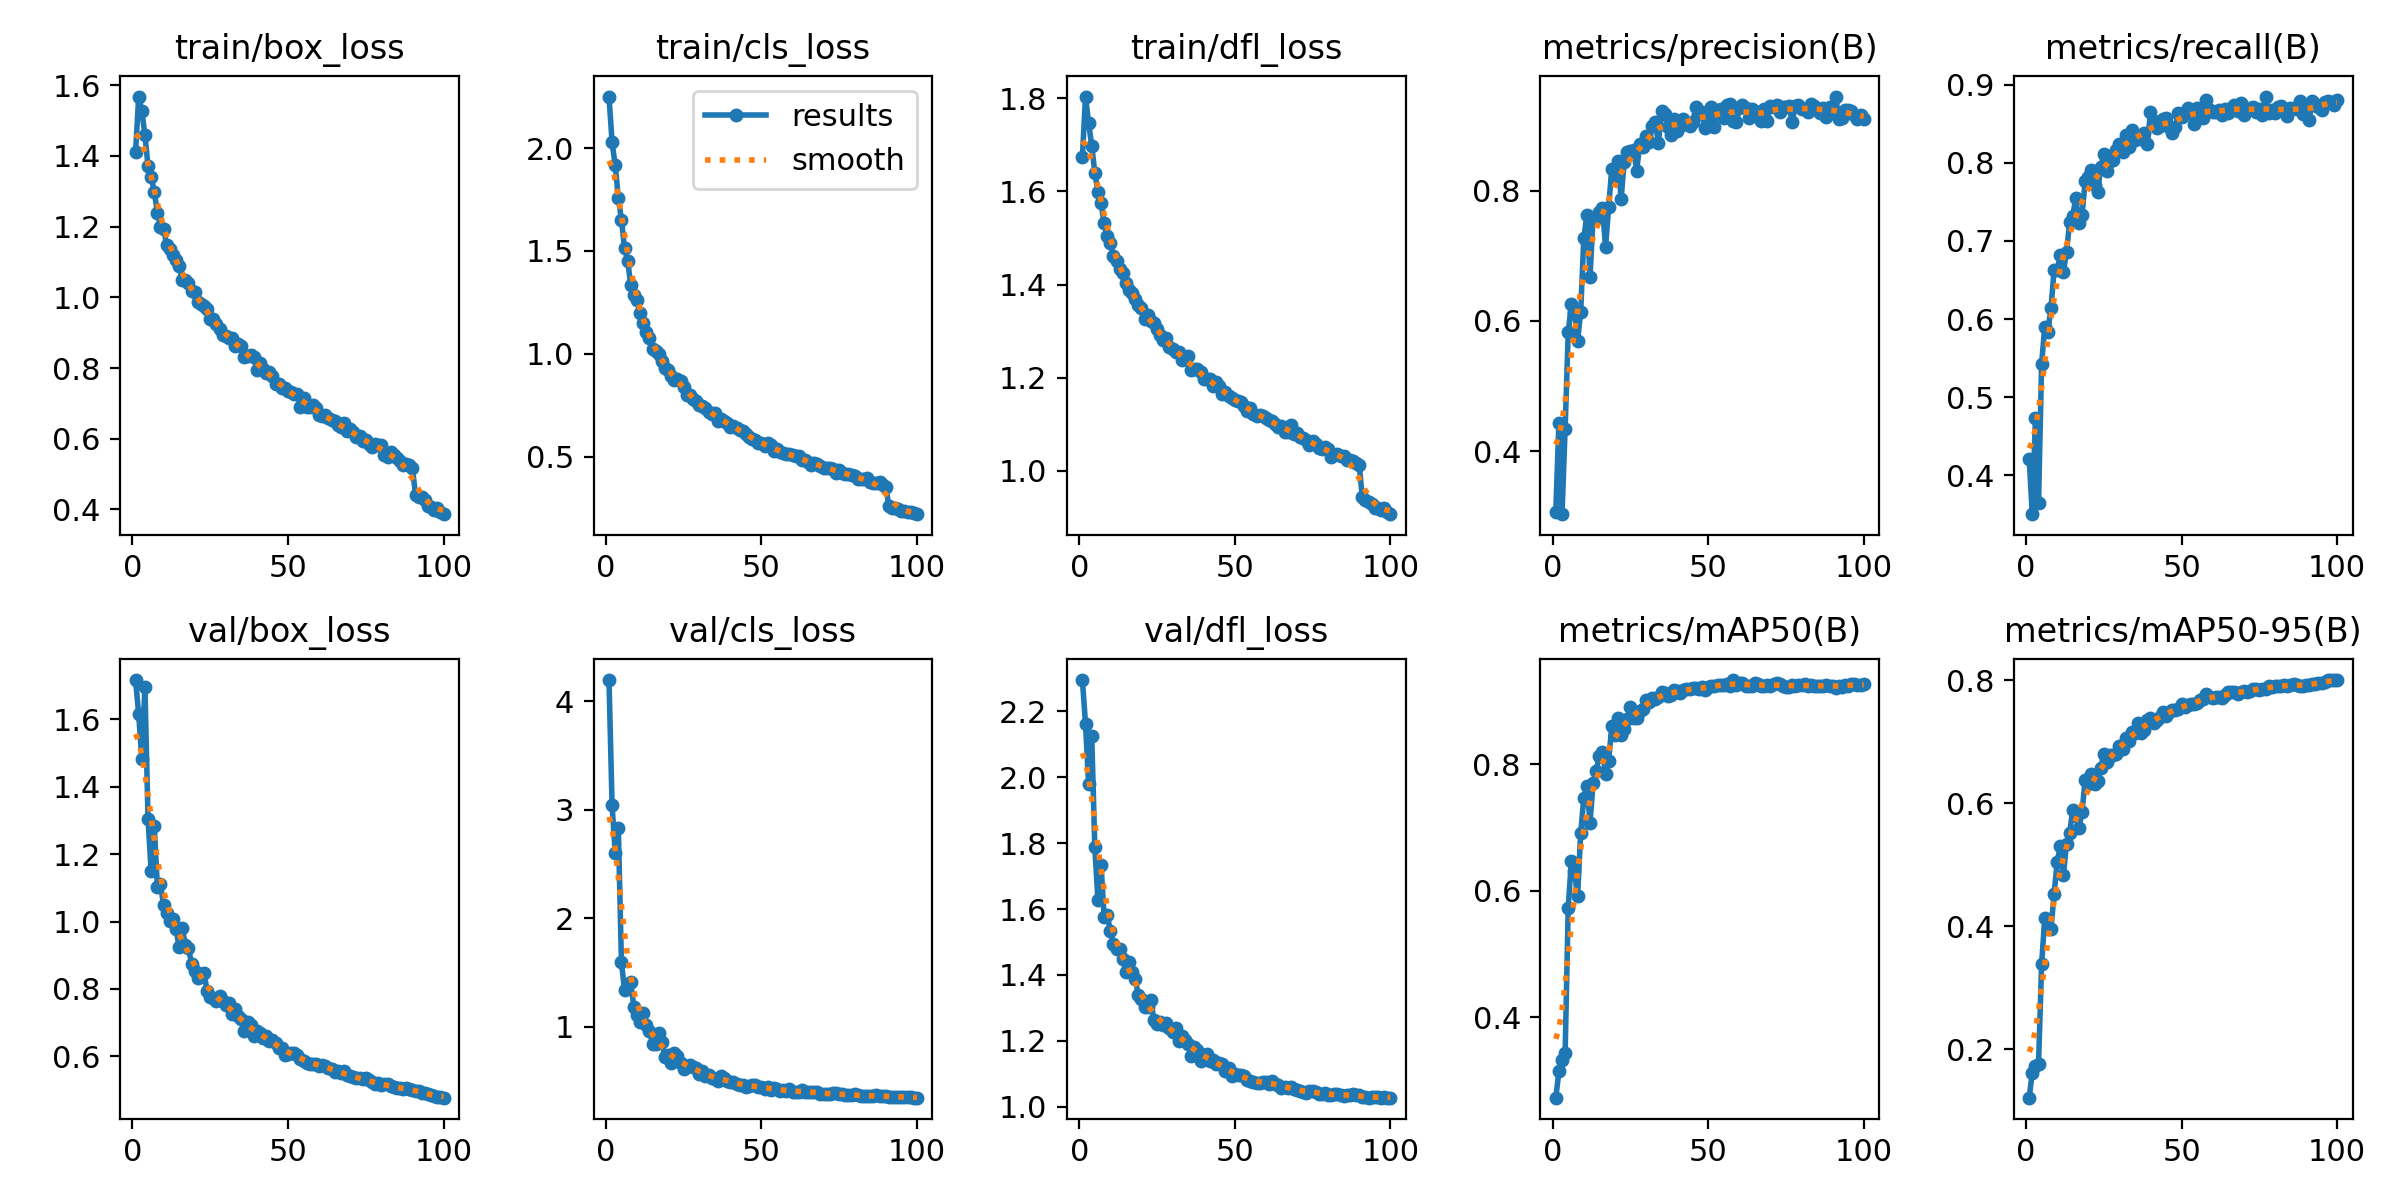

In [9]:
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

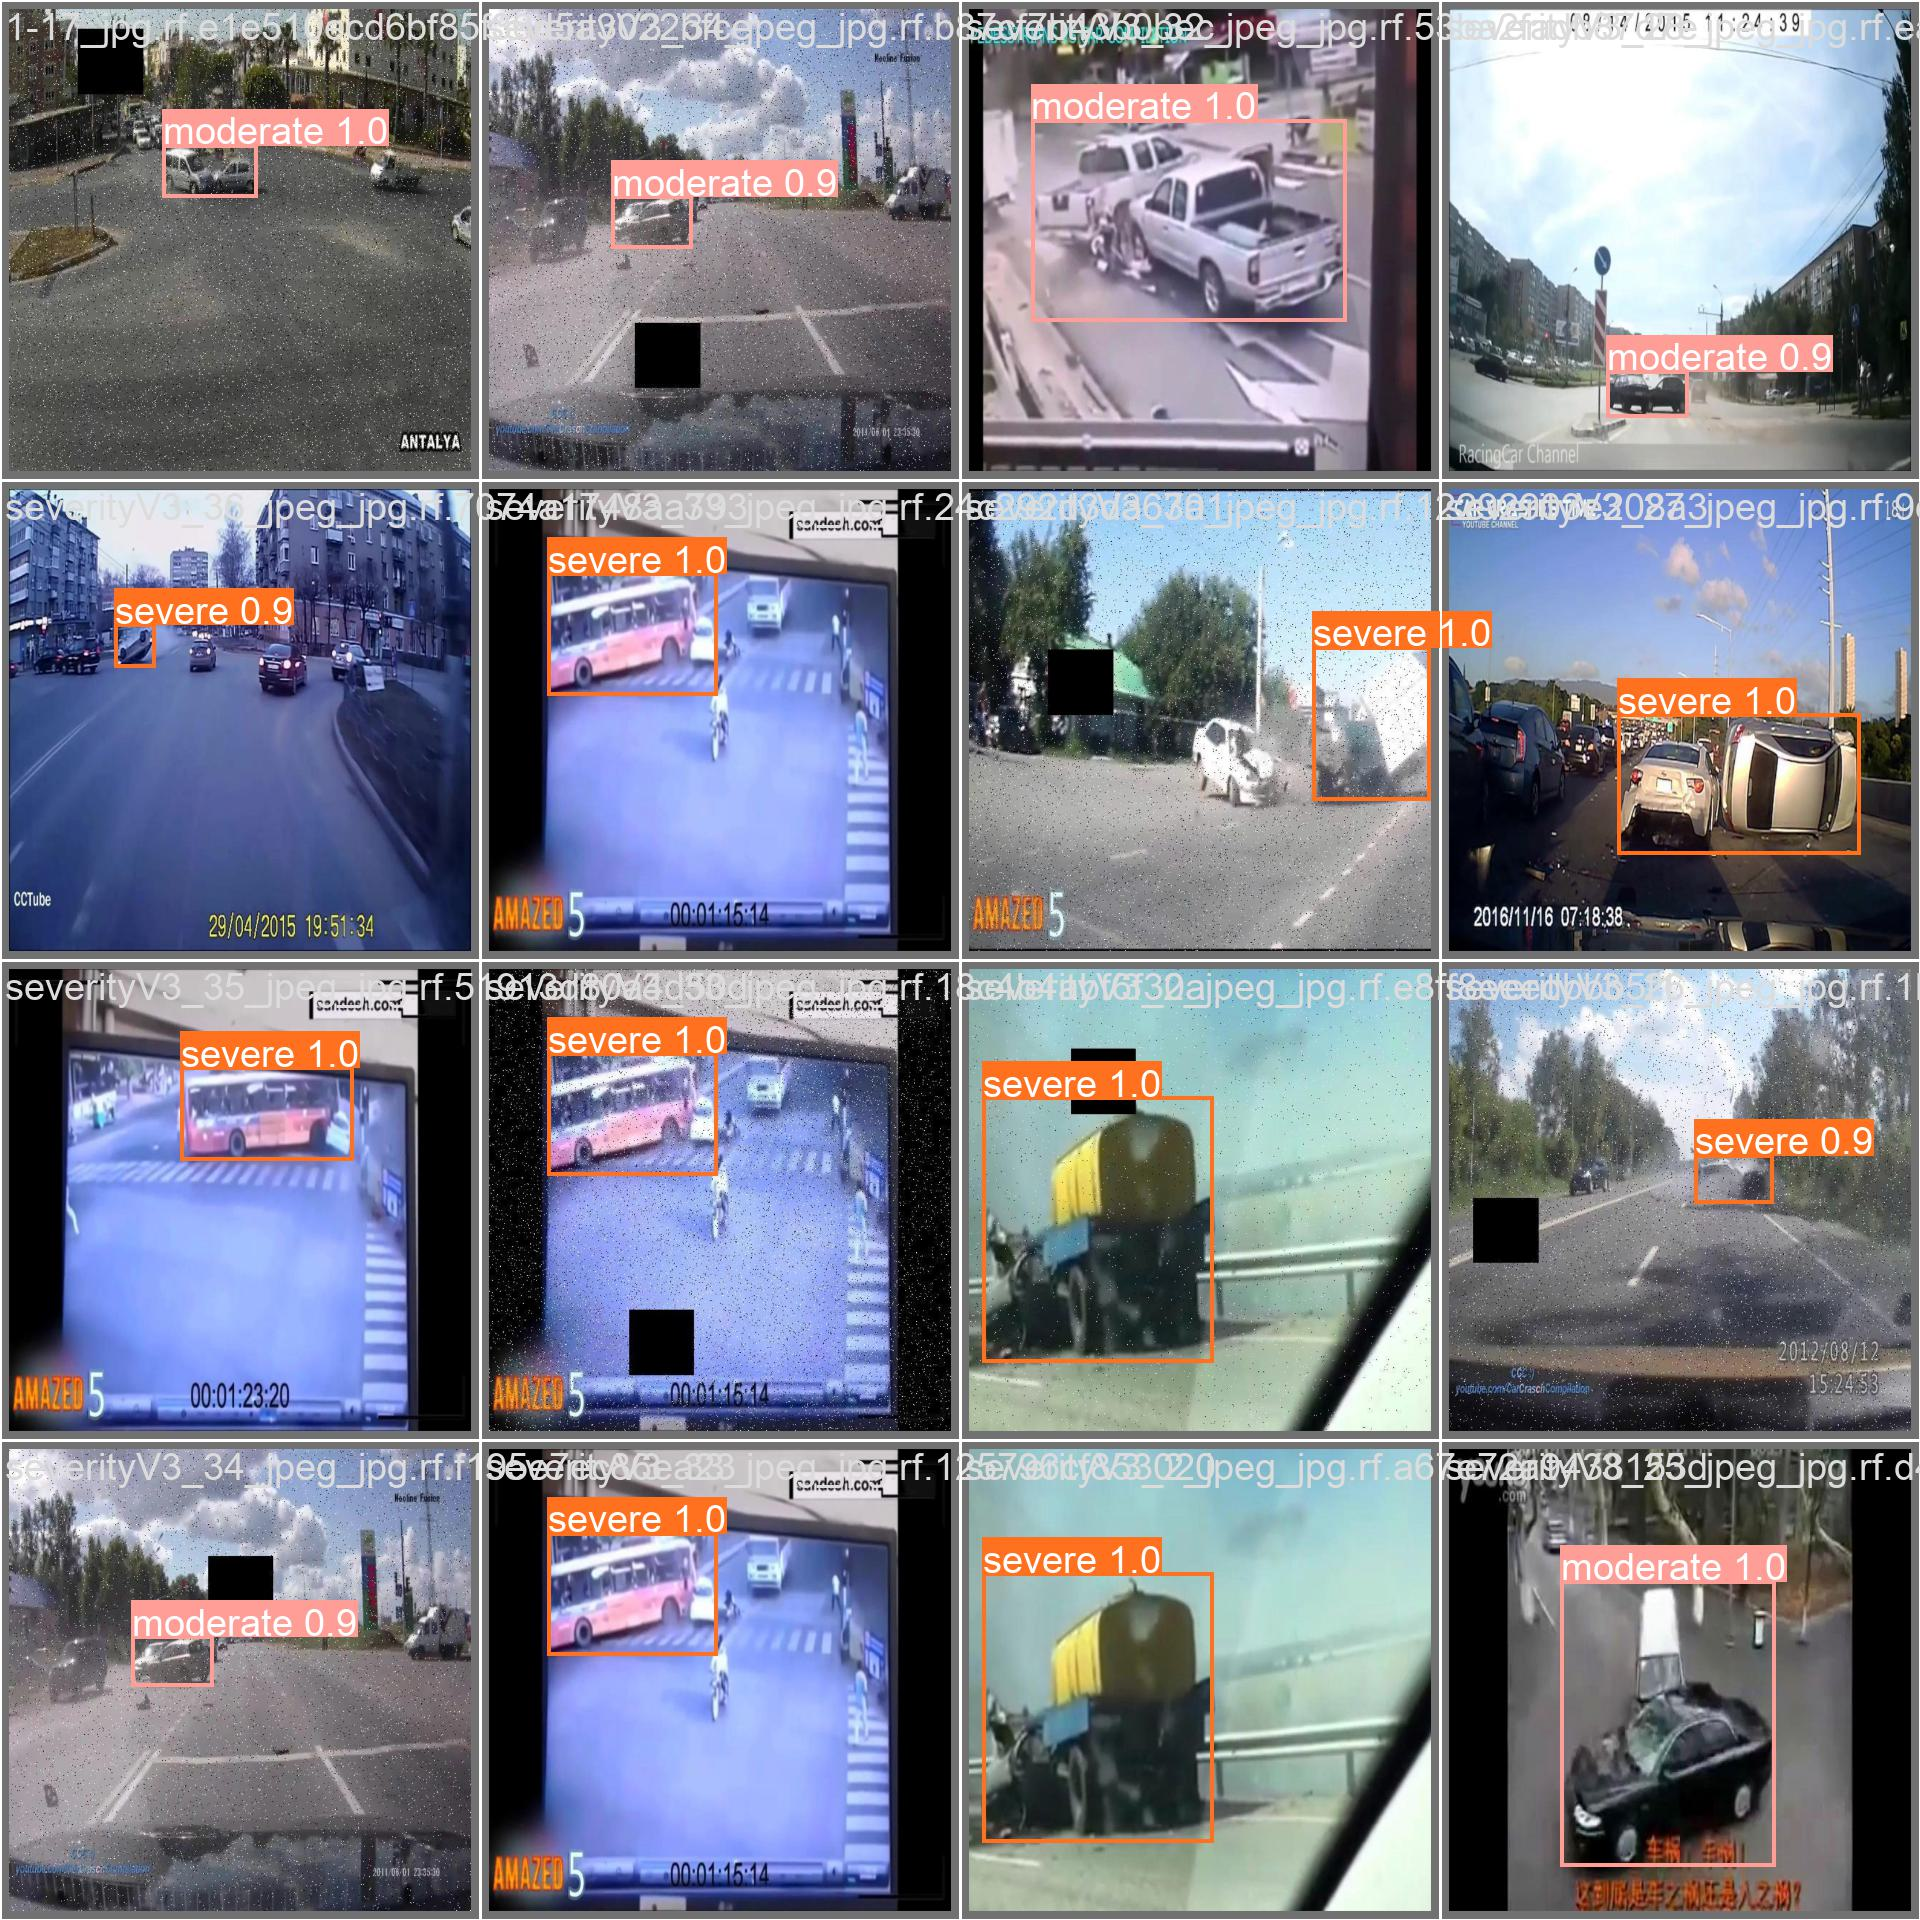

In [10]:
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

In [11]:
!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.2.0 CUDA:0 (NVIDIA GeForce RTX 3090 Ti, 24248MiB)
Model summary (fused): 218 layers, 25841497 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /Car_Acc_NoAcc/Graduation-Project-1/valid/labels.cache... 1476 ima
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all       1476       2382       0.91      0.881      0.927        0.8
            NoAccident       1476       1008      0.819       0.76      0.832      0.497
              moderate       1476        327      0.926      0.952      0.976      0.957
                severe       1476       1047      0.985       0.93      0.971      0.946
Speed: 0.4ms preprocess, 7.5ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


In [12]:
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

Ultralytics YOLOv8.0.196 🚀 Python-3.10.13 torch-2.2.0 CUDA:0 (NVIDIA GeForce RTX 3090 Ti, 24248MiB)
Model summary (fused): 218 layers, 25841497 parameters, 0 gradients, 78.7 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/760 /Car_Acc_NoAcc/Graduation-Project-1/test/images/10-79_jpg.rf.f518abaa3ec08d543c35620803c85114.jpg: 800x800 1 moderate, 12.4ms
image 2/760 /Car_Acc_NoAcc/Graduation-Project-1/test/images/1042_jpeg_jpg.rf.a9db8078d7957fc393ecf80cfd8f0838.jpg: 800x800 1 severe, 13.5ms
image 3/760 /Car_Acc_NoAcc/Graduation-Project-1/test/images/1042_jpeg_jpg.rf.f967609fc3c25686bdb382bdb06c204d.jpg: 800x800 1 severe, 11.7ms
image 4/760 /Car_Acc_NoAcc/Graduation-Project-1/test/images/1080_jpeg_jpg.rf.4e9773ae9e0bdf64d956f128275b3f47.jpg: 800x800 (no detections), 11.5ms
image 5/760 /Car_Acc_NoAcc/Graduation-Project-1/test/images/1083_jpeg_jpg.rf.eba4f56e4ddbd96e18f4e929d6a6fb87.jpg: 800x800 1 severe, 11.6ms
image 6/760 /Car_Acc_NoAcc/Graduation-Project-1/test/images/14-169_jpg.

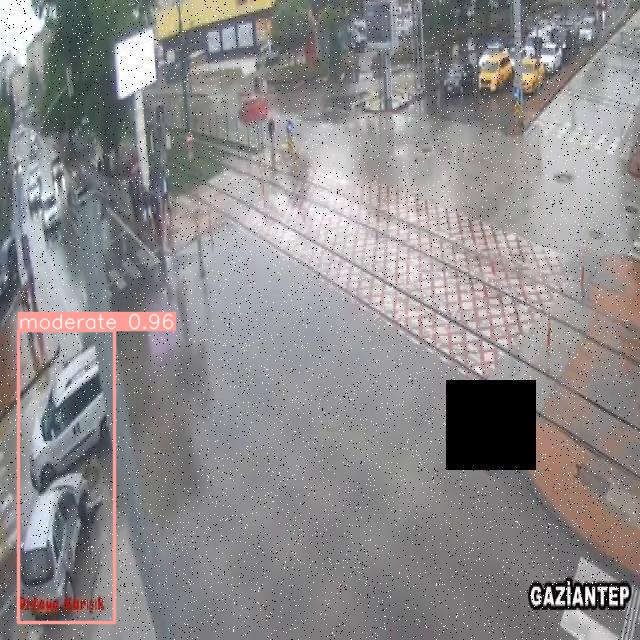

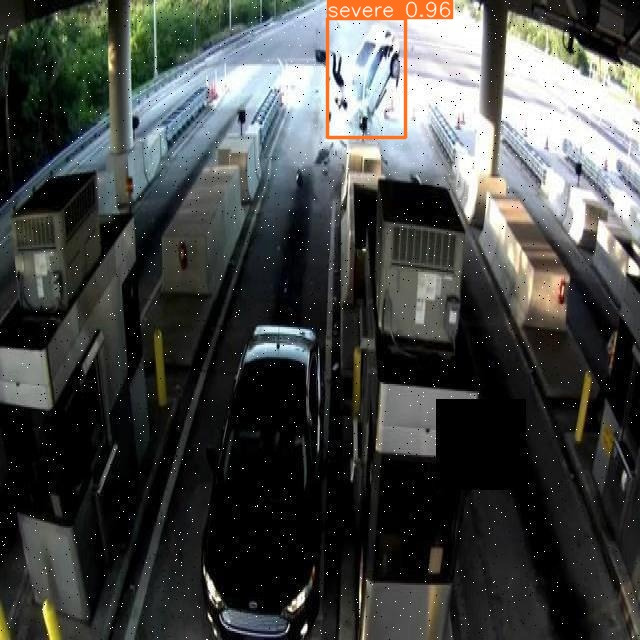

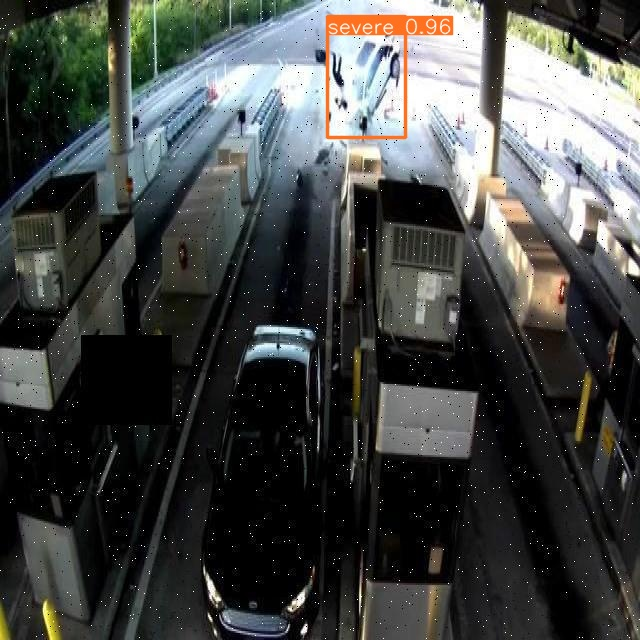

In [14]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

In [19]:
model = YOLO("runs/detect/train/weights/best.pt")

model.predict("acc1.png", save=True, imgsz=320, conf=0.5)


image 1/1 /Car_Acc_NoAcc/acc1.png: 192x320 1 moderate, 152.1ms
Speed: 2.3ms preprocess, 152.1ms inference, 562.1ms postprocess per image at shape (1, 3, 192, 320)
Results saved to runs/detect/predict2


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'NoAccident', 1: 'moderate', 2: 'severe'}
 orig_img: array([[[20, 20, 20],
         [20, 20, 20],
         [20, 20, 20],
         ...,
         [20, 20, 20],
         [20, 20, 20],
         [20, 20, 20]],
 
        [[20, 20, 20],
         [20, 20, 20],
         [20, 20, 20],
         ...,
         [20, 20, 20],
         [20, 20, 20],
         [20, 20, 20]],
 
        [[20, 20, 20],
         [20, 20, 20],
         [20, 20, 20],
         ...,
         [20, 20, 20],
         [20, 20, 20],
         [20, 20, 20]],
 
        ...,
 
        [[67, 58, 36],
         [65, 56, 34],
         [65, 56, 34],
         ...,
         [68, 42, 29],
         [64, 38, 25],
         [65, 39, 26]],
 
        [[66, 57, 35],
         [65, 56, 34],
         [64, 55, 33],
         ...,
         [63, 37, 24],
         [65, 39, 26],
         [66, 40, 27]],
 
      